# Regression

In statistical modeling, regression analysis estimates the relationship between one or more independent variables and the dependent variable which represents the outcome.

To explain with an example you can imagine a list of houses, with information regarding to the size, distance to city center, garden (independent variables). Using these information, you can try to understand how the price(dependent variables) changes.

## Linear Models for Regression

Linear regression is one of the most used regression models due to its simplicity and ease of understanding the results. 

The linear regression function is written assuming a linear relationship between the variables:

$$y=w_1x_1+...+w_nx_n+c$$

where w terms are the regression coefficients, x terms are the independent variables or features, y is dependent variable/outcome and c is the constant bias term.

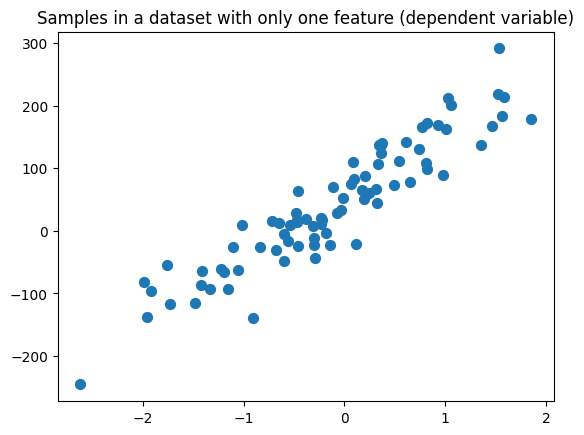

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
plt.figure()
plt.title('Samples in a dataset with only one feature (dependent variable)')
X, y = make_regression(n_samples = 80, n_features=1,
n_informative=1, bias = 50,
noise = 40, random_state=42)
plt.scatter(X, y, marker= 'o', s=50)
plt.show()

The dataset above has only one dependent variable. In this case, the regression function would be:

$$y=w_1x_1+c$$

where w1 would be the slope the curve and c would be the offset value.

## Least-Squared Linear Regression

In the Least-Squared linear regression model the coefficients and bias are determined by minimizing the sum of squared differences (SSR) for all of the samples in the data. This model is also called Ordinary Least-Squares.

$$RSS(w,c)=\sum_i^n(y_i−(w*x_i+b))^2$$

If we interpret the function, it is a function determined by taking the square of the difference between the predicted outcome value and the real outcome value.

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)
print('feature coefficient (w_1): {}'.format(model.coef_))
print('intercept (c): {:.3f}'.format(model.intercept_))
print('R-squared score (training):{:.3f}'.format(model.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(model.score(X_test, y_test)))

feature coefficient (w_1): [101.41780398]
intercept (c): 53.342
R-squared score (training):0.891
R-squared score (test): 0.735


Here, R² is the coefficient of determination. This term represents the amount of variation in outcome(y) explained by the dependence on features (x variables). Therefore, a larger R² indicates a better model performance or a better fit.

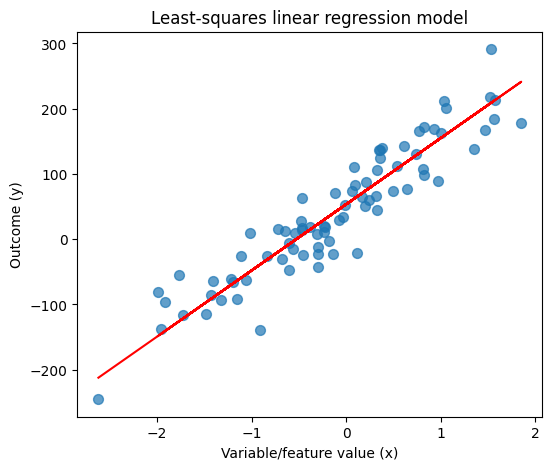

In [3]:
plt.figure(figsize=(6,5))
plt.scatter(X, y, marker= 'o', s=50, alpha=0.7)
plt.plot(X, model.coef_*X + model.intercept_, 'r-')
plt.title('Least-squares linear regression model')
plt.xlabel('Variable/feature value (x)')
plt.ylabel('Outcome (y)')
plt.show()

## Ridge Regression — L2 Regularization

Ridge regression model calculates coefficients and the bias (w and c) using the same criteria in Least-Squared however with an extra term.

$$RSS(w,c)=\sum_i^n(y_i−(w*x_i+b))^2 + \alpha\sum_{j=1}^mw_j^2$$

This term is a penalty to adjust the large variations in the coefficients. The linear prediction formula is still the same but only the way coefficients are calculated differs due to this extra penalty term. This is called regularization. It serves to prevent overfitting by restricting the variation of the coefficients which results in a less complex or simpler model.

This extra term is basically the sum of squares of the coefficients. Therefore, when we try to minimize the RSS function, we also minimize the the sum of squares of the coefficients which is called L2 regularization. Moreover, the alpha constant serves to control the influence of this regularization. This way, in comparison to the Least-Squared model, we can actually control the complexity of our model with the help of alpha term. The higher alpha term, higher the regularization is, and simpler the model will be.

The accuracy improvement with datasets including one dependent variable (feature) is not significant. However, for datasets with multiple features, regularization can be very effective to reduce model complexity, therefore overfitting and increase model performance on test set.

In [4]:
from sklearn import datasets
from sklearn.linear_model import Ridge
X,y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42)
model = Ridge()
model.fit(X_train, y_train)
print('feature coefficients: {}'.format(model.coef_))
print('intercept (c): {:.3f}'.format(model.intercept_))

feature coefficients: [  50.55201232  -67.7222237   278.30122846  197.62263845   -6.24583645
  -26.22672623 -151.39433086  120.3233589   215.85446319  101.75577423]
intercept (c): 152.514


## Lasso Regression — L1 Regularization

Lasso regression is also a regularized linear regression model. In comparison to Ridge regression, it uses L1 regularization as the penalty term while calculating the coefficients.

$$RSS(w,c)=\sum_i^n(y_i−(w*x_i+b))^2 + \alpha\sum_{j=1}^m|w_j|$$


The penalty term for L1 regularization is the sum of absolute values of the coefficients. Therefore, when the algorithm tries to minimize RSS, it enforces the regularization by minimizing the sum of absolute values of the coefficients.

This results in coefficients of the least effective paramaters to be 0 which is kind of like feature selection. Therefore, it is most effectively used for datasets where there a few features with a more dominant effect compared to others. This results in eliminating features which have a small effect by setting their coefficients to 0.

Alpha term is again used to control the amount of regularization.

## Ridge or Lasso?

To sum up, it makes sense to use the Ridge regression model there are many small to medium effective features. If there are only a few dominantly effective features, use the Lasso regression model.

## Polynomial Regression

Linear regression performs well on the assumption that the relationship between the independent variables (features) and the dependent variable(outcome) is linear. If the distrubtion of the data is more complex and does not show a linear behaviour, can we still use linear models to represent such datasets? This is where polynomial regression comes in very useful.

To capture this complex behaviour, we can add higher order terms to represent the features in the data. Transforming the linear model with one feature:

$$ y = w_1x + c \to y = w_1x + w_2x^2 + c$$

Since the coefficients are related to features linearly, this is still a liner model. However, it contains quadratic terms and the curve fitted is a polynomial curve.

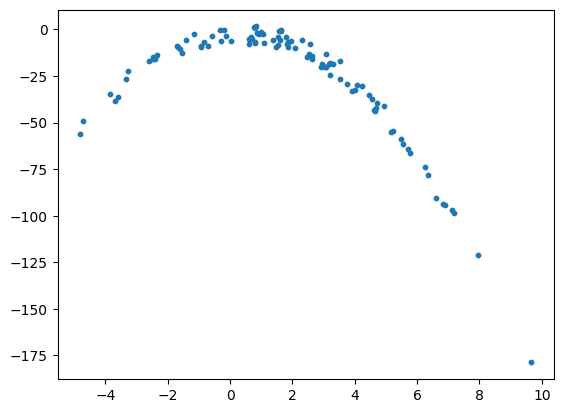

In [6]:
import numpy as np

np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X - 2 * (X ** 2)  + np.random.normal(-3, 3, 100)
plt.scatter(X, y, s=10)
plt.show()

We can reshape the arrays we created so that we can feed them in to the model. First, we will train a LinearRegression model to see how it fits to this data.

feature coefficients: 
[[-6.36572661]]
R-squared score (training): 0.397


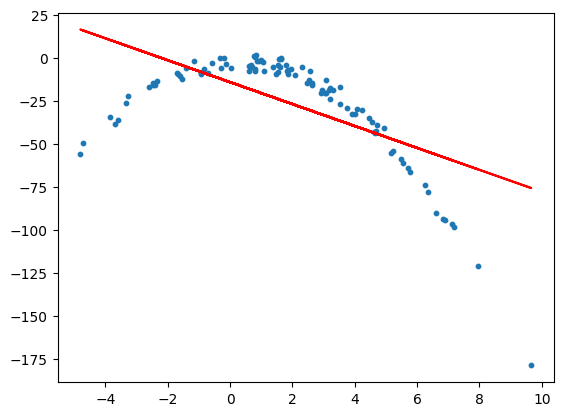

In [7]:
X = X[:, np.newaxis]
y = y[:, np.newaxis]
model = LinearRegression()
model.fit(X,y)
print('feature coefficients: \n{}'.format(model.coef_))
print('R-squared score (training): {:.3f}'.format(model.score(X, y)))
plt.plot(X, model.coef_*X + model.intercept_, 'r-')
plt.scatter(X,y, s=10)
plt.show()

As expected, Linear Regression model does not provide a very good fit with the normal features for a dataset of this behaviour. Now, we can create 2nd order Polynomial features using the PolynomialFeatures class from sk-learn library. Then, use these new 2nd order features to train the same linear regression model.

feature coefficients: 
[[ 0.          0.96597113 -2.02225052]]
R-squared score (training): 0.990


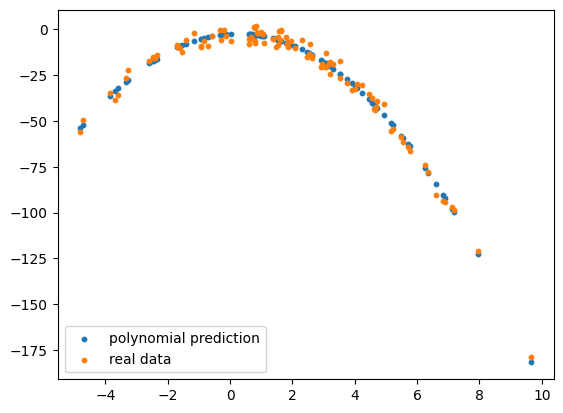

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_features= PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly,y)
print('feature coefficients: \n{}'.format(model.coef_))
print('R-squared score (training): {:.3f}'.format(model.score(X_poly, y)))
plt.scatter(X,model.predict(X_poly),s=10,label="polynomial prediction")
plt.scatter(X,y,s=10,label="real data")
plt.legend(loc='lower left')
plt.show()